In [1]:
import pandas as pd
import enchant
import matplotlib.pyplot as plt
from functools import reduce
from wordcloud import WordCloud
from textblob import TextBlob

%matplotlib inline

In [153]:
from nltk.corpus import words
from nltk.corpus import stopwords

import nltk
nltk.download('words')
nltk.download('stopwords')

[nltk_data] Downloading package words to
[nltk_data]     /Users/piocalderon/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/piocalderon/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
nominees = pd.read_csv('nominees.csv')
winners = pd.read_csv('winners.csv')

In [64]:
winners = winners.dropna()
nominees = nominees.dropna()

In [155]:
all_words = set(words.words())
common_words = [word for word in all_words if not word[0].isupper()]
stop_words = set(stopwords.words('english'))

1920s
1930s
1940s
1950s
1960s
1970s
1980s
1990s
2000s
2010s


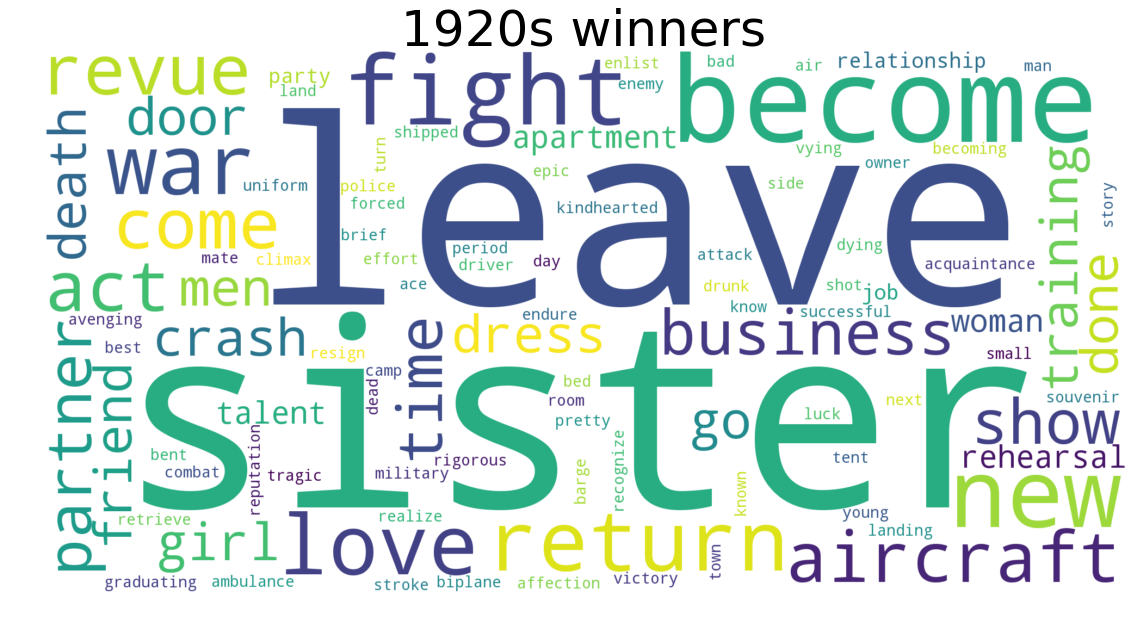

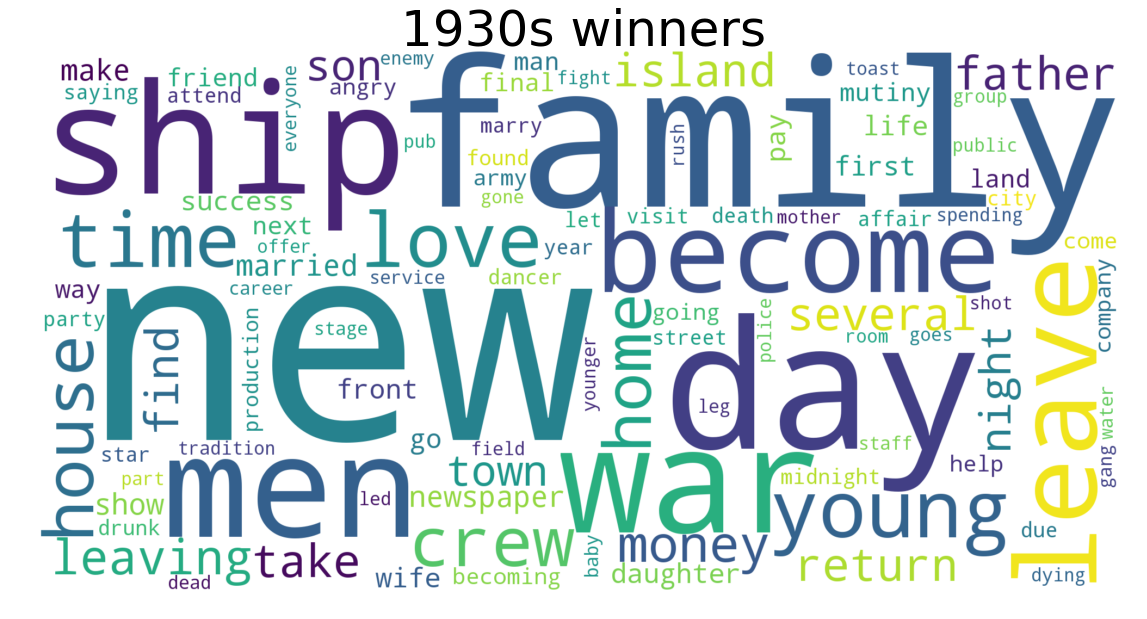

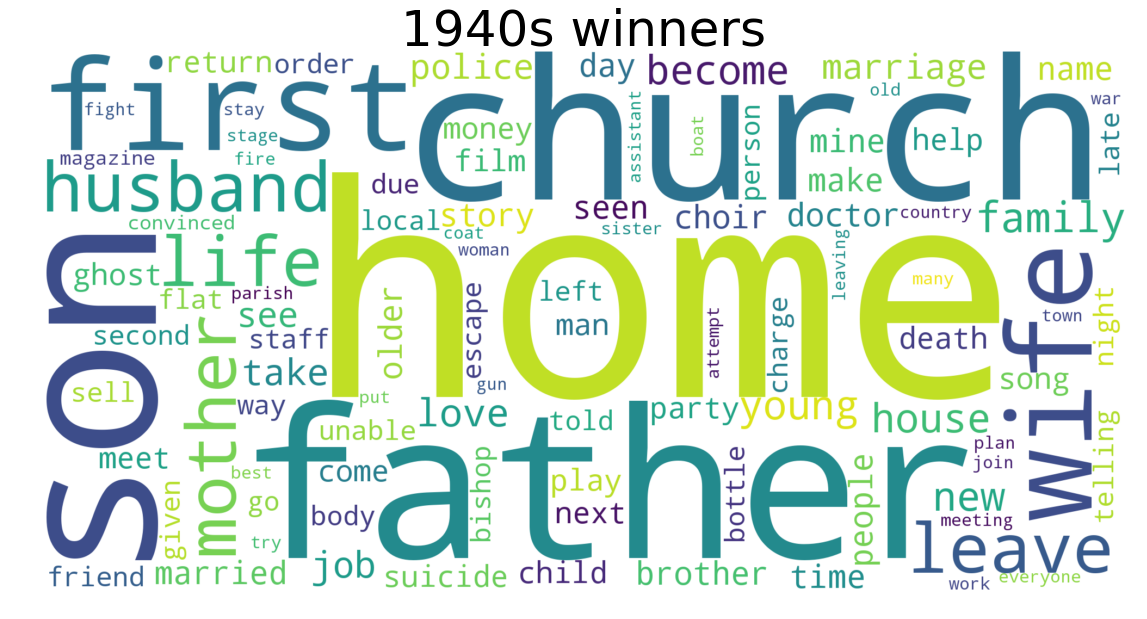

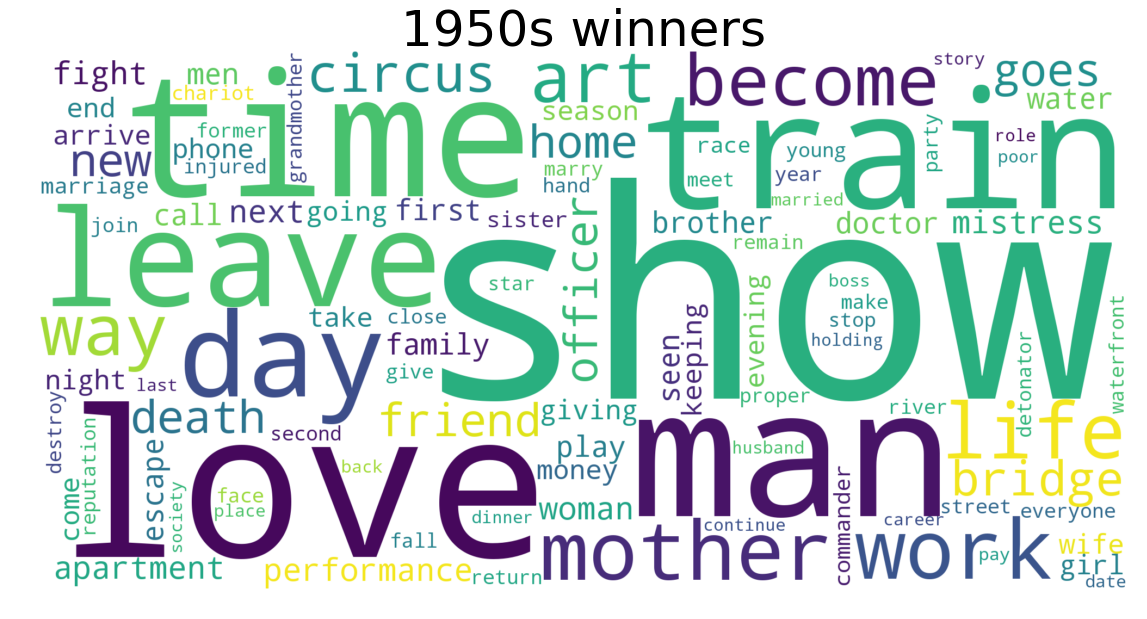

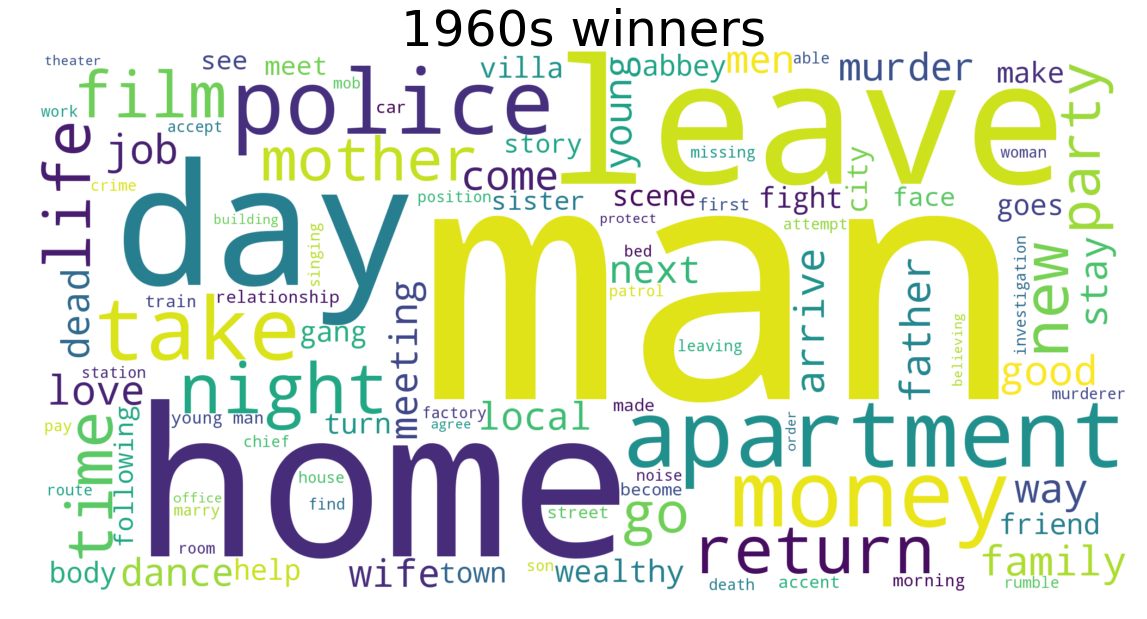

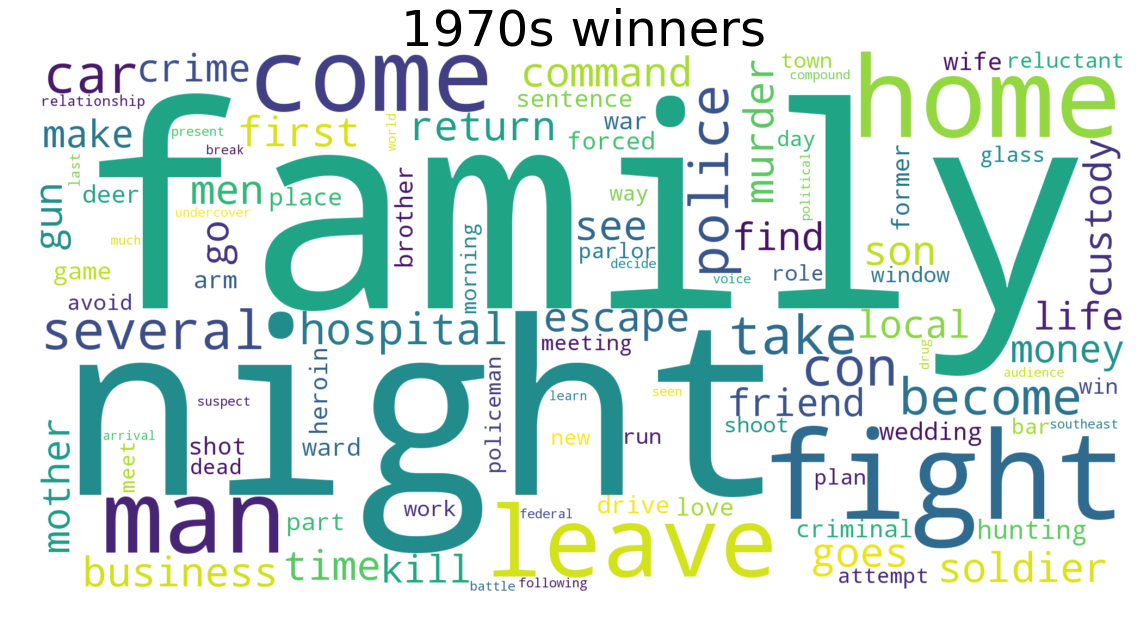

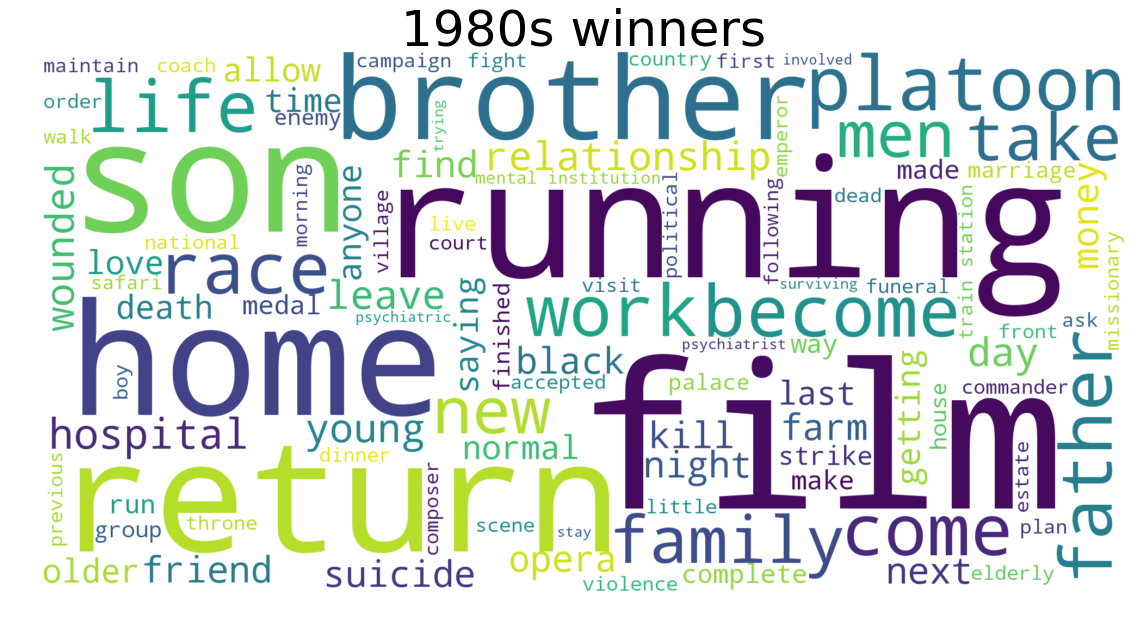

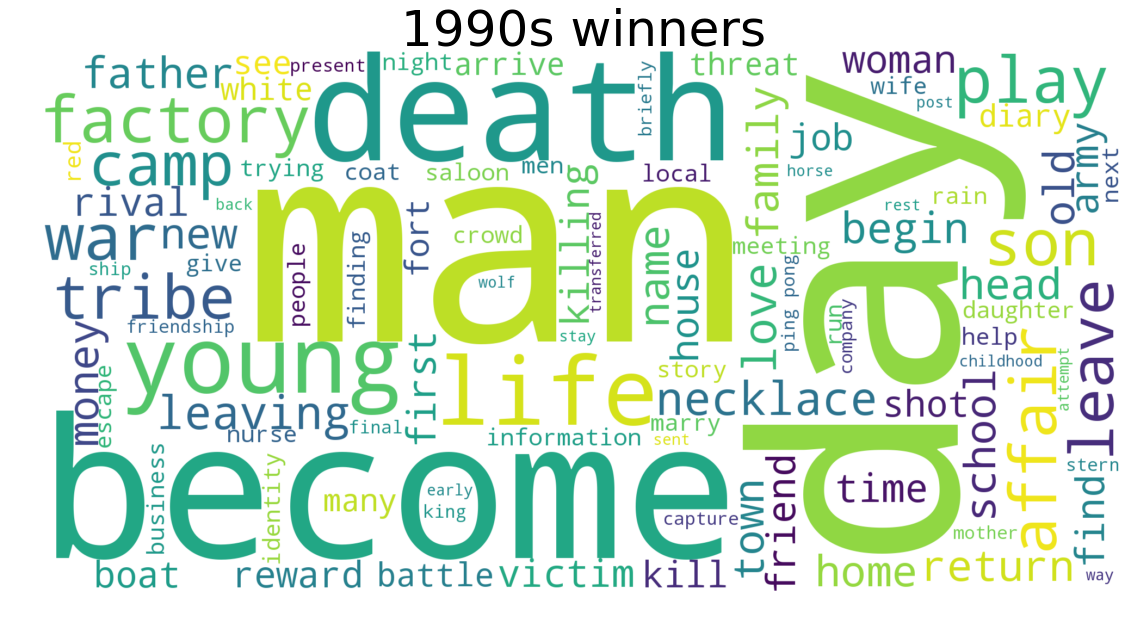

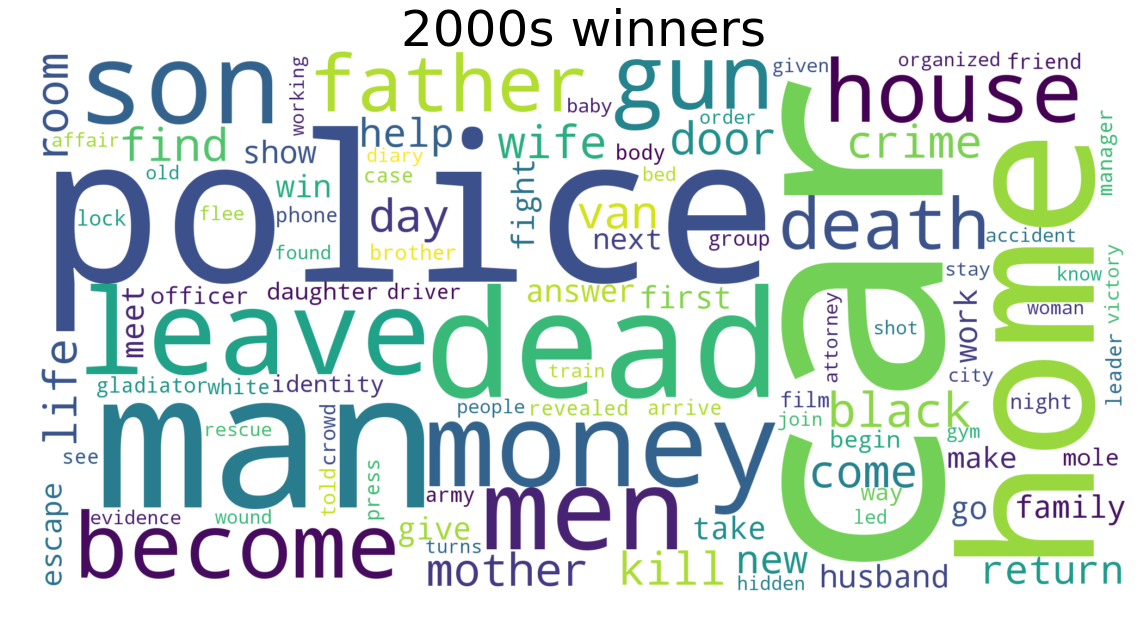

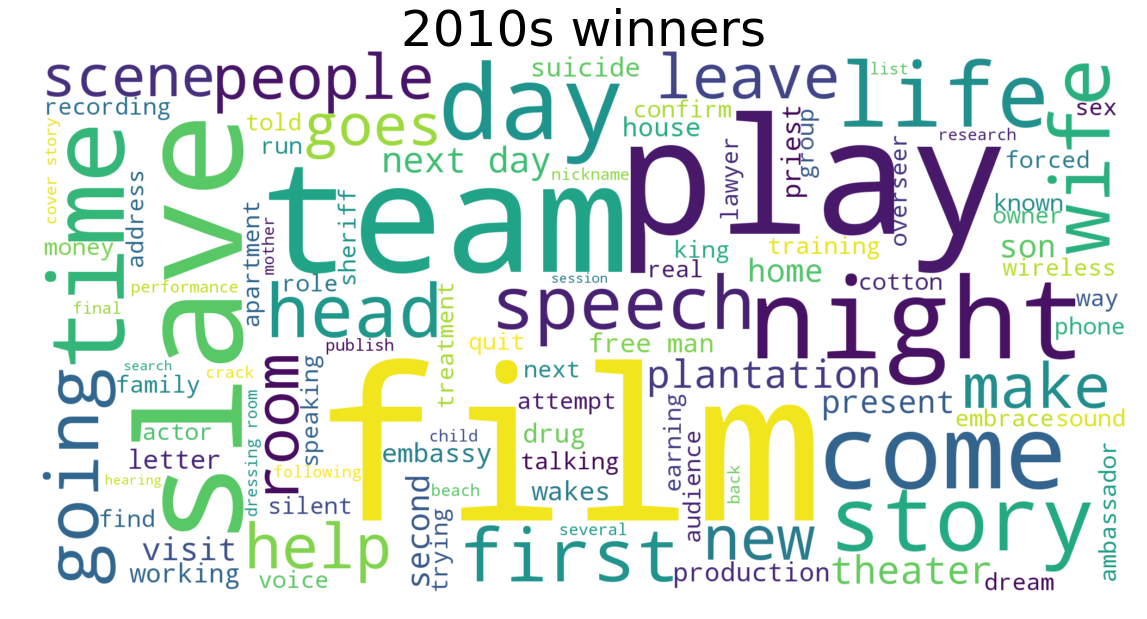

In [156]:
for index, decade in enumerate(decades):
    print('{}0s'.format(192+index))
    
    winnerslist = winners.loc[winners['decade'] == decade, 'plot'].values
    nomineeslist = nominees.loc[nominees['decade'] == decade, 'plot'].values
    
    winnersplotoverall = reduce(lambda x,y: x + ' ' + y, winnerslist)
    nomineesplotoverall = reduce(lambda x,y: x + ' ' + y, nomineeslist)
    
    wo = TextBlob(winnersplotoverall)
    wo_tags = wo.tags
    filtered = [w[0] for w in wo_tags if (w[1].startswith('NN')) or (w[1].startswith('JJ')) or (w[1].startswith('VB'))]
    
    no = TextBlob(nomineesplotoverall)
    no_tags = no.tags
    filtered_no = [w[0] for w in no_tags if (w[1].startswith('NN')) or (w[1].startswith('JJ')) or (w[1].startswith('VB'))]


    english = []
    for w in filtered:
        if (w in common_words) and (w not in stop_words):
            english.append(w)    
    
    english_no = []
    for w in filtered_no:
        if (w in common_words) and (w not in stop_words):
            english_no.append(w)    
    
    winnerscloud = WordCloud(width=2000, height=1000, max_words = 100, background_color='white').generate(' '.join(english))
    nomineescloud = WordCloud(width=2000, height=1000, max_words = 100, background_color='white').generate(' '.join(english_no))    

    plt.figure(figsize=(20,10))
    plt.imshow(nomineescloud, interpolation='bilinear')
    plt.title('{}0s nominees'.format(192+index), size=50)
    plt.axis("off")  
    plt.savefig('nominee_{}0s.png'.format(192+index))
    
    plt.clf()

    plt.figure(figsize=(20,10))
    plt.imshow(winnerscloud, interpolation='bilinear')
    plt.title('{}0s winners'.format(192+index), size=50)
    plt.axis("off")    
    plt.savefig('winner_{}0s.png'.format(192+index))


In [117]:
# look at word cloud changes over the decades

In [ ]:
# sentiment analysis

In [116]:
# wikipedia summary classifier probability of win